In [1]:
import torch
import torch.nn as nn
import torch.functional as F

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Normal weight initialization

## Initialize a signel layer with normal weights

In [3]:
def init_module_normal(module):
    classname = module.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        print("init module with {} input features".format(module.in_features))
        n = module.in_features
        std_weight = (1.0/np.sqrt(n))
        module.weight.data.normal_(0, std_weight)
        module.bias.data.fill_(0)

In [4]:
def init_network_normal(neural_network):
    print("init network with normal weights")
    neural_network.apply(init_module_normal)

## initialize a whole network with normal weights

In [20]:
class network(nn.Module):
    def __init__(self, in_features = 900, nb_classes = 2):
        super(network, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features = 100)
        self.fc2 = nn.Linear(in_features=100, out_features = 20)
        self.fc3 = nn.Linear(in_features=20, out_features=nb_classes)
        # init linear layers with normal weights with std = 1/sqrt(nb_in)
        init_network_normal(self)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.Relu(x)
        x = self.fc2(x)
        x = F.Relu(x)
        x = self.fc3(x)
        x = F.Relu(x)

# TEST

In [21]:
ze_network = network()

init network with normal weights
init module with 900 input features
init module with 100 input features
init module with 20 input features


In [22]:
print(type(ze_network.fc1.weight.data))
w = ze_network.fc1.weight.data.numpy()
print(np.average(w))
print(np.std(w))

<class 'torch.Tensor'>
0.00013349112
0.03326612


In [23]:
def check_normal(module):
    class_name = module.__class__.__name__ 
    if class_name.find("Linear") != -1:
        n = module.in_features
        st = 1./np.sqrt(n)
        w = module.weight.data.numpy()
        print(np.average(w), np.std(w), st)
        
    

In [24]:
def check_normal_network(network):
    for name, module in network.named_modules():
        class_name = module.__class__.__name__ 
        if class_name.find("Linear") != -1:
            print(name)
            check_normal(module)

In [25]:
check_normal_network(ze_network)

fc1
0.00013349112 0.03326612 0.03333333333333333
fc2
-0.0012800592 0.09846138 0.1
fc3
0.049253713 0.23843732 0.22360679774997896


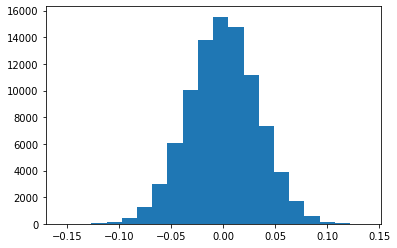

In [42]:
h = plt.hist(ze_network.fc1.weight.data.reshape(-1), bins = 20)

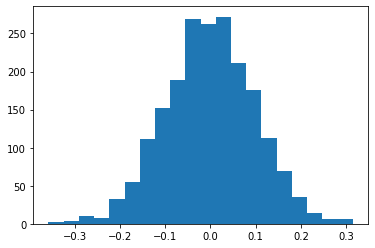

In [43]:
h = plt.hist(ze_network.fc2.weight.data.reshape(-1), bins = 20)

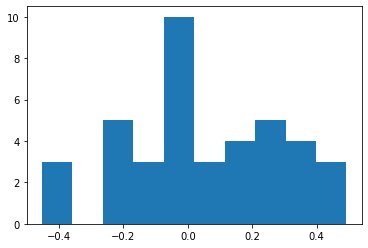

In [45]:
h = plt.hist(ze_network.fc3.weight.data.reshape(-1))